# Web Scraping using Python

**Web Scraping** : Its a process used to describe the use of a program or algo. to extract and process large amounts of data from the web.

**Steps :**
1. Data Extraction.
2. Data Manipulation.
3. Data Visualization.


### 1. Importing Libraries 

In [2]:
import pandas as pd
import numpy as np
import re
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

* **requests** : used to extract the HTML code of the given url 

* **BeautifulSoup** : Scrape and format the data from the HTML 

### 2. Accessing HTML content fro the webpage

In [5]:
url  = "https://en.wikipedia.org/wiki/NIFTY_50"
page  = requests.get(url)
page.status_code
htmlcode = page.text
#htmlcode 

### 3. Prettifying the HTML Content

In [97]:
# html = page.content
soup = BeautifulSoup(htmlcode)

### 4. Extract all tables from URL

In [34]:
all_tables  = soup.find_all('table')


# the command below is going to display all the tables
# all_tables

[<table class="infobox vcard"><caption class="infobox-title fn n org">NIFTY 50</caption><tbody><tr class="logo"><td class="infobox-image" colspan="2"><a class="image" href="/wiki/File:Nifty_50_Logo.svg"><img alt="Nifty 50 Logo.svg" data-file-height="198" data-file-width="504" decoding="async" height="86" src="//upload.wikimedia.org/wikipedia/en/thumb/b/be/Nifty_50_Logo.svg/220px-Nifty_50_Logo.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/b/be/Nifty_50_Logo.svg/330px-Nifty_50_Logo.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/b/be/Nifty_50_Logo.svg/440px-Nifty_50_Logo.svg.png 2x" width="220"/></a></td></tr><tr><th class="infobox-label" scope="row">Operator</th><td class="infobox-data">DPS EAST</td></tr><tr><th class="infobox-label" scope="row"><a href="/wiki/Stock_exchange" title="Stock exchange">Exchanges</a></th><td class="infobox-data"><a href="/wiki/National_Stock_Exchange_of_India" title="National Stock Exchange of India">National Stock Exchange of India</a><

In [23]:
my_table = soup.find("table", { "class" : "wikitable sortable" })

In [20]:
print(my_table)

<table class="wikitable sortable" id="constituents" style="font-size:85%">
<tbody><tr>
<th>Company Name</th>
<th>Symbol</th>
<th>Sector
</th></tr>
<tr>
<td><a href="/wiki/Adani_Ports_%26_SEZ" title="Adani Ports &amp; SEZ">Adani Ports</a></td>
<td>ADANIPORTS.NS</td>
<td>Infrastructure
</td></tr>
<tr>
<td><a href="/wiki/Asian_Paints" title="Asian Paints">Asian Paints</a></td>
<td>ASIANPAINT.NS</td>
<td>Consumer Goods
</td></tr>
<tr>
<td><a href="/wiki/Axis_Bank" title="Axis Bank">Axis Bank</a></td>
<td>AXISBANK.NS</td>
<td>Banking
</td></tr>
<tr>
<td><a href="/wiki/Bajaj_Auto" title="Bajaj Auto">Bajaj Auto</a></td>
<td>BAJAJ-AUTO.NS</td>
<td>Automobile
</td></tr>
<tr>
<td><a href="/wiki/Bajaj_Finance" title="Bajaj Finance">Bajaj Finance</a></td>
<td>BAJFINANCE.NS</td>
<td>Financial Services
</td></tr>
<tr>
<td><a href="/wiki/Bajaj_Finserv" title="Bajaj Finserv">Bajaj Finserv</a></td>
<td>BAJAJFINSV.NS</td>
<td>Financial Services
</td></tr>
<tr>
<td><a href="/wiki/Bharti_Airtel" title="Bh

In [52]:
companies = []
symbols = []
sectors = []


for row in my_table.find_all('tr'):
    cell = row.find_all('td')
    if len(cell) == 3:
        companies.append(cell[0].find(text=True))
        symbols.append(cell[1].find(text=True))
        sectors.append(cell[2].find(text=True))    

In [58]:
ndata = pd.DataFrame({"Company Name": companies, "Symbol": symbols, "Sector": sectors})

In [63]:
ndata = ndata.replace("\n",'',regex = True)

In [95]:
ndata.head()

,Company Name,Symbol,Sector
0,Adani Ports,ADANIPORTS.NS,Infrastructure
1,Asian Paints,ASIANPAINT.NS,Consumer Goods
2,Axis Bank,AXISBANK.NS,Banking
3,Bajaj Auto,BAJAJ-AUTO.NS,Automobile
4,Bajaj Finance,BAJFINANCE.NS,Financial Services


# Some Visualization

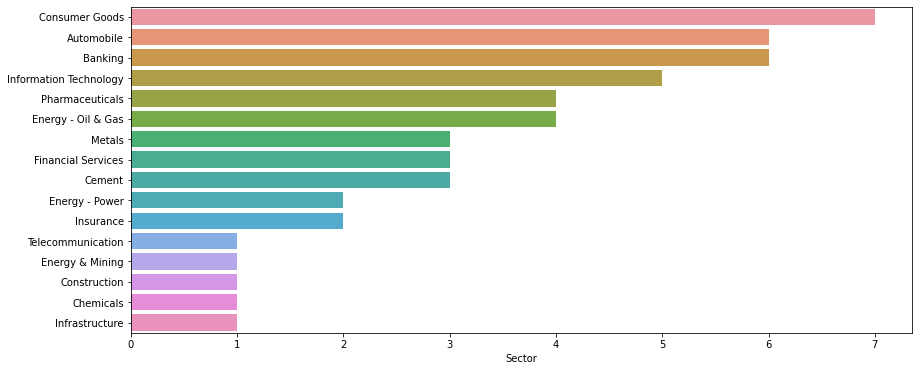

In [92]:
plt.figure(figsize = (14,6))
ny = ndata['Sector'].value_counts()
sns.barplot(y= ny.index, x = ny)
plt.show()